# Project - Wifi



wall width = 19cm # we will devide the wall into 2 (after we substract the 1 cm of the steel net)

protected spaces = 23cm # we will devide the wall into 3 (after we substract the 2 cm of the steel net)

the Mild Steel width = 1cm

door width = 5cm (wood made)
and the protected space door width is 10cm (steel made)

distance between the steel poles is 20cm and in protected spaces is 10cm, in 3D the poles becomes net

in regular wall there is one net of steel and in protected spaces there are two

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import epsilon_0, mu_0

In [87]:
def Wall(epsilon, mu, sigma, minIndex, maxIndex, location, direction = 'None'):

  '''
  epsilon is the matrix of the Permittivity of the wall
  mu is the matrix of the Permeability of the wall
  sigma is the matrix of the Conductivity of the Wall
  minIndex is the begining index of the Wall
  maxIndex is the ending index of the Wall
  location is the position of the center of the wall in the other axis
  direction mite be only vertical or horizontal
  
  '''
  I,J = mu.shape

  ConcretePermeability = 0.0000085 # H/m
  ConcretePermittivity = 20*epsilon_0 # F/m
  ConcreteConductivity = 0.1 # S/m

  MildSteelpermeability = 0.0000045 # H/m
  MildSteelPermittivity = 7.85*epsilon_0 # F/m
  MildSteelConductivity =  100000 # S/m

  

  epsilon = np.copy(epsilon)
  mu = np.copy(mu)
  sigma = np.copy(sigma)

  if direction == 'horizontal':
    for j in range(minIndex,maxIndex):
      if j%20 == 0:
        # Metal pole
        epsilon[location,j] = MildSteelPermittivity
        mu[location,j] = MildSteelpermeability
        sigma[location,j] = MildSteelConductivity
      else:
        epsilon[location,j] = ConcretePermittivity
        mu[location,j] = ConcretePermeability
        sigma[location,j] = ConcreteConductivity

      # Concrete 
      epsilon[location-9:location,j] = ConcretePermittivity
      epsilon[location+1:location+10,j] = ConcretePermittivity
      mu[location-9:location,j] = ConcretePermeability
      mu[location+1:location+10,j] = ConcretePermeability
      sigma[location-9:location,j] = ConcreteConductivity
      sigma[location+1:location+10,j] = ConcreteConductivity

      
  elif direction=='vertical':
    for i in range(minIndex,maxIndex):
      if i%20 == 0:
        # Metal pole
        epsilon[i,location] = MildSteelPermittivity
        mu[i,location] = MildSteelpermeability
        sigma[i,location] = MildSteelConductivity
      else:
        epsilon[i,location] = ConcretePermittivity
        mu[i,location] = ConcretePermeability
        sigma[i,location] = ConcreteConductivity

      # Concrete 
      epsilon[i,location-9:location] = ConcretePermittivity
      epsilon[i,location+1:location+10] = ConcretePermittivity
      mu[i,location-9:location] = ConcretePermeability
      mu[i,location+1:location+10] = ConcretePermeability
      sigma[i,location-9:location] = ConcreteConductivity
      sigma[i,location+1:location+10] = ConcreteConductivity

      
  return(epsilon, mu, sigma)


def ProtectedWall(epsilon, mu, sigma, minIndex, maxIndex, location, direction = 'None'):
  '''
  epsilon is the matrix of the Permittivity of the wall
  mu is the matrix of the Permeability of the wall
  sigma is the matrix of the Conductivity of the Wall
  minIndex is the begining index of the Wall
  maxIndex is the ending index of the Wall
  location is the position of the center of the wall in the other axis
  direction mite be only vertical or horizontal
  
  '''

  I,J = mu.shape

  ConcretePermeability = 0.0000085 # H/m
  ConcretePermittivity = 20*epsilon_0 # F/m
  ConcreteConductivity = 0.1 # S/m

  MildSteelpermeability = 0.0000045 # H/m
  MildSteelPermittivity = 7.85*epsilon_0 # F/m
  MildSteelConductivity =  100000 # S/m

  

  epsilon = np.copy(epsilon)
  mu = np.copy(mu)
  sigma = np.copy(sigma)

  if direction == 'horizontal':
    for j in range(minIndex,maxIndex):
      if j%10 == 0:
        # Metal pole
        epsilon[location-4,j] = MildSteelPermittivity
        epsilon[location+4,j] = MildSteelPermittivity

        mu[location-4,j] = MildSteelpermeability
        mu[location+4,j] = MildSteelpermeability

        sigma[location-4,j] = MildSteelConductivity
        sigma[location+4,j] = MildSteelConductivity

      else: 
        # between the poles
        epsilon[location-4,j] = ConcretePermittivity
        epsilon[location+4,j] = ConcretePermittivity

        mu[location-4,j] = ConcretePermeability
        mu[location+4,j] = ConcretePermeability

        sigma[location-4,j] = ConcreteConductivity
        sigma[location+4,j] = ConcreteConductivity

      # All the rest
      epsilon[location-11:location-4,j] = ConcretePermittivity
      epsilon[location-3:location+4,j] = ConcretePermittivity
      epsilon[location+5:location+12,j] = ConcretePermittivity

      mu[location-11:location-4,j] = ConcretePermeability
      mu[location-3:location+4,j] = ConcretePermeability
      mu[location+5:location+12,j] = ConcretePermeability

      sigma[location-11:location-4,j] = ConcreteConductivity
      sigma[location-3:location+4,j] = ConcreteConductivity
      sigma[location+5:location+12,j] = ConcreteConductivity

      
  elif direction=='vertical':
    for i in range(minIndex,maxIndex):
      if i%10 == 0:
        # Metal pole
        epsilon[i,location-4] = MildSteelPermittivity
        epsilon[i,location+4] = MildSteelPermittivity

        mu[i,location-4] = MildSteelpermeability
        mu[i,location+4] = MildSteelpermeability

        sigma[i,location-4] = MildSteelConductivity
        sigma[i,location+4] = MildSteelConductivity

      else: 
        # between the poles
        epsilon[i,location-4] = ConcretePermittivity
        epsilon[i,location+4] = ConcretePermittivity

        mu[i,location-4] = ConcretePermeability
        mu[i,location+4] = ConcretePermeability

        sigma[i,location-4] = ConcreteConductivity
        sigma[i,location+4] = ConcreteConductivity

      # All the rest
      epsilon[i,location-11:location-4] = ConcretePermittivity
      epsilon[i,location-3:location+4] = ConcretePermittivity
      epsilon[i,location+5:location+12] = ConcretePermittivity

      mu[i,location-11:location-4] = ConcretePermeability
      mu[i,location-3:location+4] = ConcretePermeability
      mu[i,location+5:location+12] = ConcretePermeability

      sigma[i,location-11:location-4] = ConcreteConductivity
      sigma[i,location-3:location+4] = ConcreteConductivity
      sigma[i,location+5:location+12] = ConcreteConductivity

      
  return(epsilon, mu, sigma)

def Door(epsilon, mu, sigma, minIndex, maxIndex, location, direction = 'None'):
  '''
  epsilon is the matrix of the Permittivity of the house
  mu is the matrix of the Permeability of the house
  sigma is the matrix of the Conductivity of the door
  minIndex is the begining index of the door
  maxIndex is the ending index of the door
  location is the position of the center of the door in the other axis
  direction mite be only vertical or horizontal
  '''
   
  Woodpermeability = 0.0000006 # H/m
  WoodPermittivity = 5*epsilon_0 # F/m
  WoodConductivity =  0.05 # S/m

  epsilon = np.copy(epsilon)
  mu = np.copy(mu)
  sigma = np.copy(sigma)

  if direction == 'horizontal':
    for j in range(minIndex,maxIndex):
      # Concrete 
      epsilon[location-2:location+3,j] = WoodPermittivity
      mu[location-2:location+3,j] = Woodpermeability
      sigma[location-2:location+3,j] = WoodConductivity
      
  elif direction=='vertical':
    for i in range(minIndex,maxIndex):
      # Concrete 
      epsilon[i,location-2:location+3] = WoodPermittivity
      mu[i,location-2:location+3] = Woodpermeability
      sigma[i,location-2:location+3] = WoodConductivity

  return(epsilon, mu, sigma)


def ProtectedDoor(epsilon, mu, sigma, minIndex, maxIndex, location, direction = 'None'):
  '''
  epsilon is the matrix of the Permittivity of the house
  mu is the matrix of the Permeability of the house
  sigma is the matrix of the Conductivity of the door
  minIndex is the begining index of the door
  maxIndex is the ending index of the door
  location is the position of the center of the door in the other axis
  direction mite be only vertical or horizontal
  '''
   
  Steelpermeability = 200*mu_0 # H/m
  SteelPermittivity = 22*epsilon_0 # F/m
  SteelConductivity =  10**5 # S/m

  epsilon = np.copy(epsilon)
  mu = np.copy(mu)
  sigma = np.copy(sigma)

  if direction == 'horizontal':
    for j in range(minIndex,maxIndex):
      # Concrete 
      epsilon[location-5:location+5,j] = SteelPermittivity
      mu[location-5:location+5,j] = Steelpermeability
      sigma[location-5:location+5,j] = SteelConductivity
      
  elif direction=='vertical':
    for i in range(minIndex,maxIndex):
      # Concrete 
      epsilon[i,location-5:location+5] = SteelPermittivity
      mu[i,location-5:location+5] = Steelpermeability
      sigma[i,location-5:location+5] = SteelConductivity

  return(epsilon, mu, sigma)
    

In [88]:
dx = 10**-2 # in m 
dy = 1.0*dx

# dz = ??? 3D 

c = 1

dt = dx/c


In [89]:
PixelLengthOfTheHouse = int(10/dx) # axis x
PixelWidthOfTheHouse = int(10/dy) # axis y
# PixelheightOfTheHouse in 3D

XX, YY = np.meshgrid(range(PixelLengthOfTheHouse),range(PixelWidthOfTheHouse))

airConductivuty = 0.0005

epsilon = np.ones([PixelWidthOfTheHouse,PixelLengthOfTheHouse])*epsilon_0 # the matrix of the Permittivity of the house 
mu = np.ones([PixelWidthOfTheHouse,PixelLengthOfTheHouse])*mu_0 # the matrix of the Permeability of the house
sigma = np.ones([PixelWidthOfTheHouse,PixelLengthOfTheHouse])*airConductivuty # the matrix of the Conductivity of the house

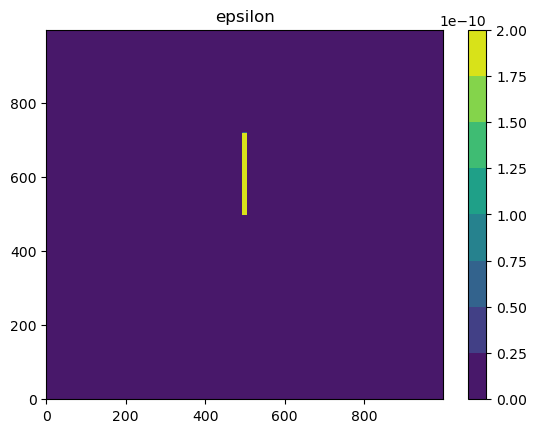

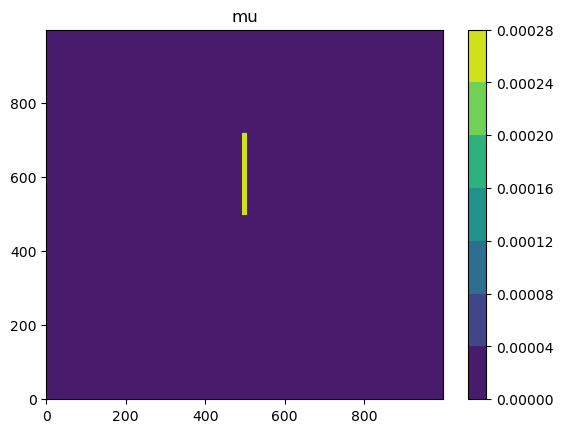

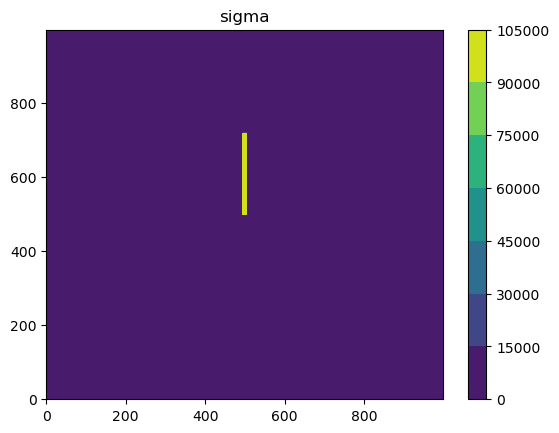

In [92]:
e, m, s = ProtectedDoor(epsilon, mu, sigma, 500, 720, 500, 'vertical')
plt.figure(); plt.contourf(XX,YY,e); plt.colorbar(); plt.title('epsilon')
plt.figure(); plt.contourf(XX,YY,m); plt.colorbar(); plt.title('mu')
plt.figure(); plt.contourf(XX,YY,s); plt.colorbar(); plt.title('sigma');
